## Intro: useful functions

In [4]:
def show_dcm_info(image_data):
    print("Filename.........:", file_path)
    print("Storage type.....:", image_data.SOPClassUID)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name......:", display_name)
    print("Patient id..........:", image_data.PatientID)
    print("Patient's Age.......:", image_data.PatientAge)
    print("Patient's Sex.......:", image_data.PatientSex)
    print("Modality............:", image_data.Modality)
    print("Body Part Examined..:", image_data.BodyPartExamined)
    print("View Position.......:", image_data.ViewPosition)
    
    if 'PixelData' in image_data:
        rows = int(image_data.Rows)
        cols = int(image_data.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(image_data.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", image_data.PixelSpacing)

def plot_pixel_array(image_data, figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(image_data.pixel_array, cmap=plt.cm.bone)
    plt.show()

Filename.........: data/dicom-images-train\1.2.276.0.7230010.3.1.2.8323329.1000.1517875165.878026\1.2.276.0.7230010.3.1.3.8323329.1000.1517875165.878025\1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: 17d405a3-a0d2-4901-b33a-63906aa48d9f, 
Patient id..........: 17d405a3-a0d2-4901-b33a-63906aa48d9f
Patient's Age.......: 38
Patient's Sex.......: M
Modality............: CR
Body Part Examined..: CHEST
View Position.......: PA
Image size.......: 1024 x 1024, 130476 bytes
Pixel spacing....: ['0.168', '0.168']


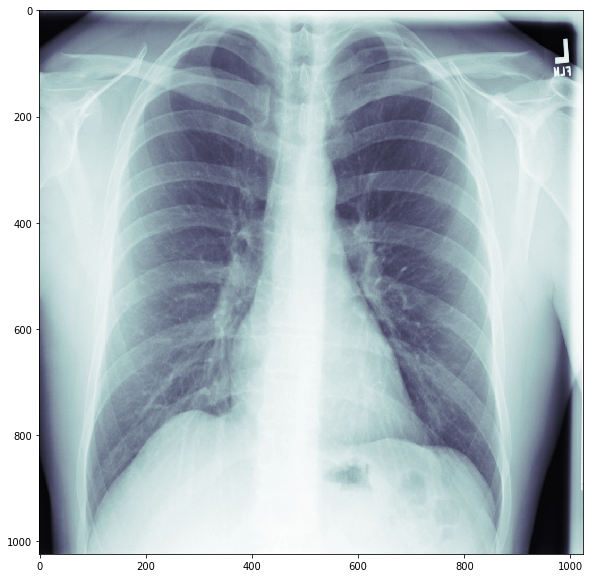

In [5]:
import glob
import pydicom
import matplotlib.pyplot as plt

prod = False
dir_data = '../input' if prod else 'data'

for file_path in glob.glob(dir_data + '/dicom-images-train/*/*/*.dcm'):
    image_data = pydicom.dcmread(file_path)
    show_dcm_info(image_data)
    plot_pixel_array(image_data)
    break

## Masks

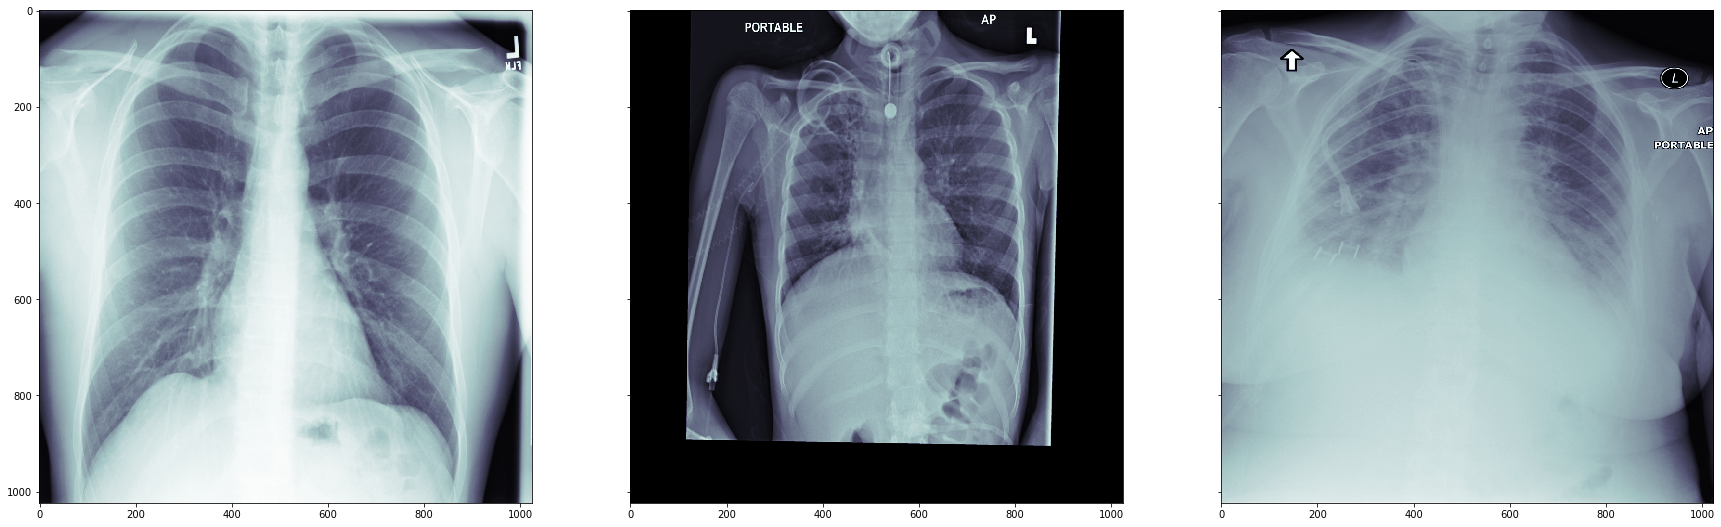

In [8]:
train_images = glob.glob(dir_data + '/dicom-images-train/*/*/*.dcm')[0:3]
train_images_num = len(train_images)
fig, ax = plt.subplots(nrows=1, ncols=train_images_num, sharey=True, figsize=(train_images_num*10,10))
for n, file_path in enumerate(train_images):
    image_data = pydicom.dcmread(file_path)
    # show_dcm_info(image_data)
    ax[n].imshow(image_data.pixel_array, cmap=plt.cm.bone)